# Analítica computacional para la toma de decisiones

Departamento de Ingeniería Industrial

Universidad de los Andes

## Exploración de datos en python

### Importar Libraries

In [2]:
import numpy as np
import pandas as pd

### Importar Dataset

In [38]:
df = pd.read_csv('.\\BikePrices.csv')

In [39]:
df.shape

(1061, 8)

In [40]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [14]:
df["Brand"].unique()

array(['TVS', 'Bajaj', 'Yo', 'Honda', 'Mahindra', 'Hero', 'Yamaha',
       'Suzuki', 'Activa', 'Vespa', 'Royal', 'Benelli', 'KTM', 'UM',
       'Kawasaki', 'Hyosung', 'BMW', 'Harley', 'Jawa', 'Aprilia'],
      dtype=object)

In [15]:
df.groupby(["Brand"]).count()

,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
Brand,,,,,,,
Activa,3,3,3,3,3,3,3
Aprilia,2,2,2,2,2,2,0
BMW,1,1,1,1,1,1,1
Bajaj,260,260,260,260,260,260,143
Benelli,1,1,1,1,1,1,1
Harley,2,2,2,2,2,2,2
Hero,232,232,232,232,232,232,108
Honda,204,204,204,204,204,204,170
Hyosung,1,1,1,1,1,1,1


In [17]:
df["Brand"].value_counts()

Brand
Bajaj       260
Hero        232
Honda       204
Royal       109
Yamaha      102
TVS          69
Suzuki       30
KTM          24
Mahindra      6
Kawasaki      4
Vespa         4
UM            3
Jawa          3
Activa        3
Harley        2
Aprilia       2
Yo            1
Benelli       1
Hyosung       1
BMW           1
Name: count, dtype: int64

In [18]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [21]:
# Porcentaje de bicicletas con marca Bajaj
counts = df.Brand.value_counts()
perc = (counts.iloc[1] / (counts.sum())) * 100
print(f'Bajaj Rate = {perc:.1f}%')

Bajaj Rate = 21.9%


In [22]:
# número de duplicados
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 6


In [23]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 435


In [41]:
# Tipos de datos en el dataset
types = df.dtypes.value_counts()

print('Number of Features: %d'%(df.shape[1]))
print('Number of Bikes: %d'%(df.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Features: 8
Number of Bikes: 1061
Data Types and Frequency in Dataset:
object     4
int64      3
float64    1
Name: count, dtype: int64


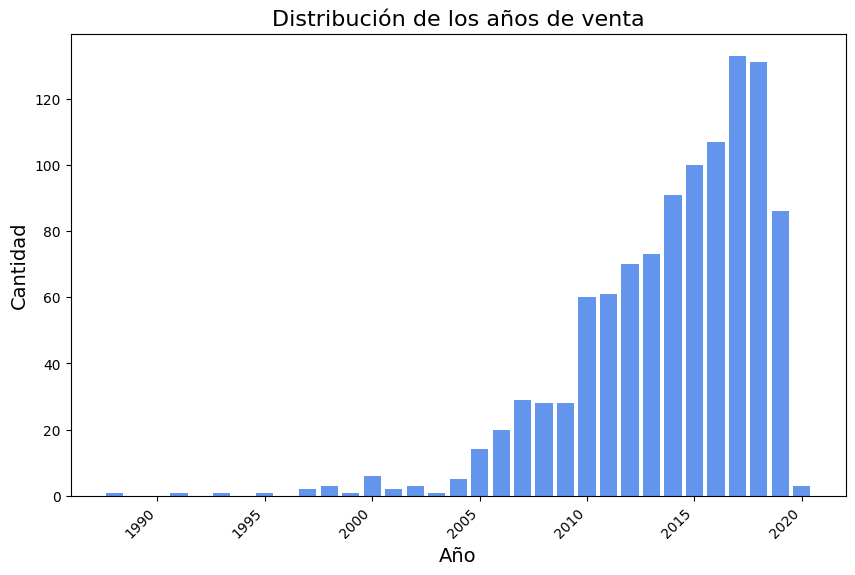

In [25]:
import matplotlib.pyplot as plt

education_counts = df['Year'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(education_counts.index, education_counts.values, color='cornflowerblue')

# Personalizar el gráfico
plt.title('Distribución de los años de venta', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x si son largas

# Mostrar el gráfico
plt.show()

## Pre-Processing

In [34]:
# Identificar cuántas categorias tiene cada una
print(df["Model"].unique())
print(df["Seller_Type"].unique())
print(df["Owner"].unique())

['TVS XL 100' 'Bajaj  ct 100' 'Yo Style' 'Bajaj Discover 100'
 'TVS Scooty Streak' 'Honda Navi [2016-2017]' 'Mahindra Flyte'
 'Bajaj Discover 100 M' 'Hero Splendor NXG' 'TVS Star City'
 'Hero Pleasure [2005-2015]' 'Bajaj Discover 100 T' 'Bajaj Discover 125 M'
 'Honda Navi' 'Mahindra Rodeo' 'Hero Splender Plus' 'Honda CB Twister'
 'Honda Dream Neo' 'Hero Maestro' 'Yamaha Saluto RX' 'Hero Pleasure'
 'Hero Splendor PRO' "Suzuki Let''s" 'Honda Activa [2000-2015]'
 'Hero Duet' 'Honda Activa 4G' 'Activa 4g' 'Hero Honda Passion Pro'
 'Honda CB twister' 'Honda Activa i [2016-2017]' 'Mahindra Gusto'
 'Suzuki Swish [2012-2015]' 'TVS Sport ' 'TVS Jupyter' 'TVS Wego'
 'Activa 3g' 'Hero Splendor iSmart' 'TVS Scooty Zest 110'
 'Bajaj Discover 110' 'Hero Maestro Edge' 'Yamaha Ray Z' 'Honda Activa i'
 'Honda Dream Yuga ' 'Hero Splender iSmart' 'Yamaha Alpha'
 'Bajaj Discover 150' 'Hero Passion PRO i3s' 'Yamaha Fascino 110'
 'Hero Passion PRO TR' 'Yamaha YBR 125' 'Honda Activa 3G' 'TVS Victor'
 'Hero P

In [36]:
# Conversión de características
df['Seller_Type'] = df['Seller_Type'].map({'Individual': 0, 'Dealer': 1})


In [37]:
catcols = df.select_dtypes(exclude = ['int64','float64']).columns
intcols = df.select_dtypes(include = ['int64']).columns
floatcols = df.select_dtypes(include = ['float64']).columns

# codificación modificada
df = pd.get_dummies(df, columns = catcols)
print('New Number of Features: %d'%(df.shape[1]))

# Nueva línea
# Nueva línea 2

New Number of Features: 308
